<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #3: ARIMAX, Compositions

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

<span style="color:red; font-size: 14pt;"> DEADLINE: 10 October 2017 23:59:59 </span>

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 


<h1 align="center">Check Questions (20%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1** Опишите ситуацию (аргументированно), в котором композиция Adaptive Selection будет прогнозировать хуже, чем лучший из базовых алгоритмов.

<Ответ>

**Вопрос 2**  Опишите ситуацию (аргументированно), в котором композиция Adaptive Composition будет прогнозировать хуже, чем лучший из базовых алгоритмов.

<Ответ>

**Вопрос 3** Что значит смешиваемость (mixability) игры (в теории агрегирующего алгоритма)?

<Ответ>

**Вопрос 4**: Верно ли, что для смешиваемых игр процесс потерь любой композиции (любого алгоритма) будет расти со временем (с ростом $t$) не быстрее, чем процесс потерь лучшего из базовых алгоритмов? Если нет - приведит пример, когда это не так.

### $$ \mathrm{Loss}_{Composition}(T)\leq \inf\limits_{BA} \mathrm{Loss}_{BA}(T)+C$$

<Ответ>

<h1 align="center">2. Contest: electricity comsumption contest (80%)</h1>
Take part in <a href='https://www.kaggle.com/t/de102b28cae74e6ead7492ff12efbc63'>contest</a>.
<span style='color:red'> You need to send the final code that is used for building forecast.</span>

In [124]:
import pandas as pd
import matplotlib as plt
import numpy as np
import math

%matplotlib inline

In [125]:
# data = pd.read_csv('train.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Date')
data = pd.read_csv('train.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Date')
data.index.names=['Timestamp']

In [126]:
data.tail()

,ID,tsID,ACTUAL,Temp,Saturday,Sunday
Timestamp,,,,,,
2012-05-08,21544,14,NaN,4.8,1.0,0
2012-05-09,21545,14,NaN,4.0,0.0,1
2012-05-10,21546,14,NaN,6.5,0.0,1
2012-05-11,21547,14,NaN,17.0,0.0,0
2012-05-12,21548,14,NaN,0.0,0.0,0


In [127]:
data.dtypes

ID            int64
tsID          int64
ACTUAL      float64
Temp        float64
Saturday    float64
Sunday        int64
dtype: object

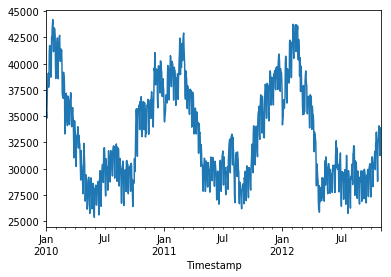

In [128]:
data.dropna(inplace=True)
data.loc[data.tsID == 4, 'ACTUAL'].plot()

In [129]:
np.unique(data.tsID)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

In [130]:
ts_id = 4

In [131]:
cur_ts = data.loc[data.tsID == ts_id]
cur_ts = cur_ts[['ACTUAL', 'Temp', 'Saturday', 'Sunday']]
cur_ts.values.shape

(1035, 4)

In [132]:
cur_ts.head()

,ACTUAL,Temp,Saturday,Sunday
Timestamp,,,,
2010-01-01,35489.95,-0.9,0.0,1
2010-01-02,35413.59,-0.1,1.0,0
2010-01-03,34802.67,-3.9,0.0,1
2010-01-04,36003.84,-13.7,0.0,1
2010-01-05,37622.96,-16.9,0.0,1


In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
scaler = MinMaxScaler()
cur_ts_scaled = scaler.fit_transform(cur_ts.values)

In [135]:
cur_ts_scaled

array([[ 0.53775112,  0.4278438 ,  0.        ,  1.        ],
       [ 0.53369675,  0.44142615,  1.        ,  0.        ],
       [ 0.50125969,  0.37691002,  0.        ,  1.        ],
       ..., 
       [ 0.42969553,  0.62139219,  0.        ,  0.        ],
       [ 0.453057  ,  0.59252971,  0.        ,  0.        ],
       [ 0.45005339,  0.62139219,  0.        ,  0.        ]])

In [136]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [147]:
reframed.shape
# reframed.columns[]

(1028, 32)

In [148]:
reframed = series_to_supervised(cur_ts_scaled, n_in=7, n_out=1)
reframed.drop(reframed.columns[[29, 30, 31]], axis=1, inplace=True)
reframed.head()

,var1(t-7),var2(t-7),var3(t-7),var4(t-7),var1(t-6),var2(t-6),var3(t-6),var4(t-6),var1(t-5),var2(t-5),...,var4(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t)
7,0.537751,0.427844,0.0,1.0,0.533697,0.441426,1.0,0.0,0.501260,0.376910,...,1.0,0.684206,0.166384,0.0,1.0,0.690582,0.146010,0.0,1.0,0.729313
8,0.533697,0.441426,1.0,0.0,0.501260,0.376910,0.0,1.0,0.565036,0.210526,...,1.0,0.690582,0.146010,0.0,1.0,0.729313,0.219015,0.0,1.0,0.658221
9,0.501260,0.376910,0.0,1.0,0.565036,0.210526,0.0,1.0,0.651004,0.156197,...,1.0,0.729313,0.219015,0.0,1.0,0.658221,0.341256,1.0,0.0,0.682865
10,0.565036,0.210526,0.0,1.0,0.651004,0.156197,0.0,1.0,0.684206,0.166384,...,1.0,0.658221,0.341256,1.0,0.0,0.682865,0.310696,0.0,1.0,0.837918
11,0.651004,0.156197,0.0,1.0,0.684206,0.166384,0.0,1.0,0.690582,0.146010,...,0.0,0.682865,0.310696,0.0,1.0,0.837918,0.196944,0.0,0.0,0.869546


In [149]:
# split into train and test sets
values = reframed.values
n_train_days = math.ceil(365*2.3)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# # reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(840, 28) (840,) (188, 28) (188,)


In [150]:
from utils import qualityMAPE
from sklearn.linear_model import LinearRegression

In [151]:
lr = LinearRegression()
lr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [152]:
# make a prediction
lr_yhat = lr.predict(test_X)[:, None]

In [155]:
# invert scaling for forecast
lr_inv_yhat = np.concatenate((lr_yhat, np.zeros((len(lr_yhat), 3))), axis=1)
print(lr_inv_yhat.shape)
print(scaler.min_)

(188, 4)
[-1.3466033   0.44312394  0.          0.        ]


In [156]:
lr_inv_yhat = scaler.inverse_transform(lr_inv_yhat)

In [157]:
lr_inv_yhat = lr_inv_yhat[:,0]

In [159]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, np.zeros((len(test_y), 3))), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [165]:
def MAPE(x, y):
    # Mean absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = (abs(x-y)/abs(x))
    return qlt.mean()

In [166]:
mape = np.sqrt(MAPE(inv_y, lr_inv_yhat))

# print('Test RMSE: %.3f, %.3f' % (rmse, rmse2))
print('Test MAPE: %.3f' % (mape))

Test MAPE: 0.132


In [ ]:
# Put your code for 
final_forecast = ???

In [80]:
# save forecast to disk for further submission
final_forecast.save('result.csv', format='csv')